In [12]:
import herbie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [13]:
def get_temp(x):
    """
    Finds the outside temperature at a given time x in Maine
    If x is in the past, it will retrieve past data
    If x is in the future, it will find the forecast
    """

    # Convert to UTC (Maine is UTC-4)
    x += timedelta(hours=4)

    # Get current UTC time (round to the hour)
    now = datetime.utcnow().replace(minute=0, second=0, microsecond=0)

    # If x is in the past
    if x < now:
        H = herbie.Herbie(
            x.strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc', # 2D surface level fields
            fxx=0,
        )
        
    # If x is now or in the future
    else:
        print('forecast')
        H = herbie.Herbie(
            (now-timedelta(hours=1)).strftime("%Y-%m-%d %H:%M"),
            model='hrrr', 
            product='sfc', # 2D surface level fields
            fxx= int((x - now).total_seconds()/3600)+1,
        )

    # Get dataset
    ds = H.xarray("TMP:2 m")

    # Get the temperature at coordinates
    latitude_value = 45.36
    longitude_value = -68.97
    points = pd.DataFrame({'latitude': [latitude_value], 'longitude': [longitude_value]})
    test = herbie.accessors.HerbieAccessor(ds)
    temperature = test.pick_points(points, method='nearest')['t2m'].values[0] 
    
    print(x)
    print(temperature)
    return temperature


In [14]:
# Today's date in Maine (UTC-4)
today = (datetime.utcnow()-timedelta(hours=4))
today_midnight = today.replace(hour=0, minute=0, second=0, microsecond=0)

# Get today's weather
wf_herbie = []
for hour in range(24):
    try:
        wf_herbie.append(get_temp(today_midnight + timedelta(hours=hour)))
    except:
        wf_herbie.append(np.nan)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 04:00:00
283.823
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 05:00:00
283.24088
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 06:00:00
282.40277
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 07:00:00
281.8326
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/thomasdefauw/miniconda3/envs/adda/lib/python3.10/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


2024-05-31 08:00:00
281.65414
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 09:00:00
281.4589
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/thomasdefauw/miniconda3/envs/adda/lib/python3.10/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 11:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 11:00:00
283.9702
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 12:00:00
286.4086
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 13:00:00
288.5496
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 14:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 14:00:00
290.3791
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 15:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 15:00:00
291.32803
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 16:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 16:00:00
292.1248
forecast
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 16:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 17:00:00
292.7762
forecast
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-31 16:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
2024-05-31 18:00:00
293.24963
forecast
✅ Found ┊ model=hrrr ┊ prod

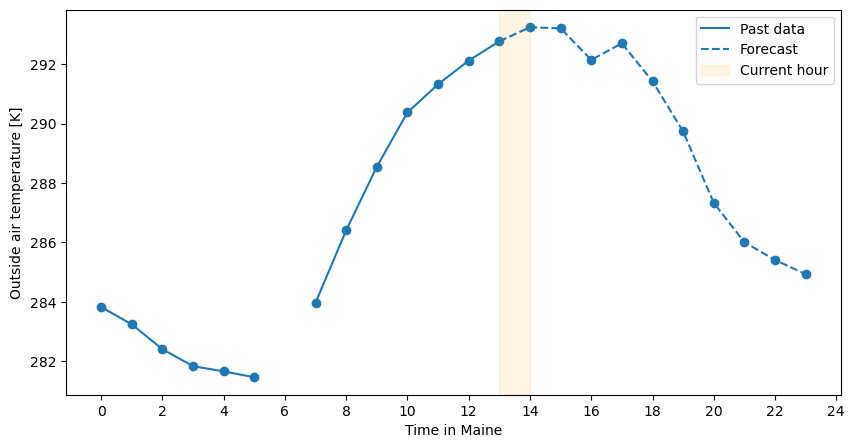

In [27]:
wf_pvlib = [9.910003662109375, 8.963134765625, 8.0264892578125, 7.2698974609375, 6.686676025390625, 6.20159912109375, 7.225433349609375, 
            9.42828369140625, 11.62158203125, 13.758331298828125, 15.75408935546875, 16.494659423828125, 16.73565673828125, 16.847991943359375, 
            16.929443359375, 17.32318115234375, 17.57550048828125, 17.572601318359375, 17.306396484375, 16.7760009765625, 15.352325439453125, 
            13.12091064453125, 11.516937255859375, 10.724700927734375]
wf_pvlib = [x+273 for x in wf_pvlib]

plt.figure(figsize=(10, 5))
plt.plot(wf_herbie[:today.hour+1],label='Past data', color='tab:blue')
plt.plot([np.nan]*(today.hour) + wf_herbie[today.hour:], label='Forecast', linestyle='dashed', color='tab:blue')
plt.scatter(range(24), wf_herbie)
plt.xticks(list(range(0,25,2)))
plt.xlabel('Time in Maine')
plt.ylabel('Outside air temperature [K]')
plt.axvspan(today.hour, today.hour+1, color='orange', alpha=0.1, label='Current hour')
plt.legend()
plt.show()